> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate medical appointment now-show data
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset contains information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. The data contains one table with the following columns: 
1. PatientId: Identification of a patient
2. AppointmentID: Identification of an appointment
3. Gender: Male or female
4. ScheduledDay: Day the patient set up their appointment
5. AppointmentDay: Day the medical appointment takes place
6. Age: Patient age
7. Neighbourhood: Neighborhood where the hospital is located
8. Scholarship: Indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
9. Hipertension: Indicates whether or not the patient has a diagnosis of hipertension. 
10. Diabetes: Indicates whether or not the patient has a diagnosis of diabetes. 
11. Alcoholism: Indicates whether or not the patient has a diagnosis of alcoholism. 
12. Handcap: Gives a value from 0 to 4. According to documentation it should display True or False. 
13. SMS_received: Indicates if one or more message was sent to the patient. 
14. No-show: Indicates if the patient did not showed up. Yes, meaning that the patient did not showed up and No, meaning that the patient showed up for their appointment. 
> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected/downloaded for analysis. Read through the description available on the homepage-links present [here](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True). List all column names in each table, and their significance. In case of multiple tables, describe the relationship between tables. 


### Question(s) for Analysis
1. What factors are important in order to predict if a patient will show up for their scheduled appointment?
2. Is the period between scheduling an appointment and the actual appointment an indicator if someone shows up? 
3. Is there a correlation between receiving a message and showing up for the appointment. 
>**Tip**: Clearly state one or more questions that you plan on exploring over the course of the report. You will address these questions in the **data analysis** and **conclusion** sections. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names. 

In [348]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns


# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

  Using cached pandas-0.25.0.tar.gz (12.6 MB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [1119 lines of output]
      /private/var/folders/62/6z8vlkbs425_g2crjpj269m80000gp/T/pip-install-vre2ncqz/pandas_c0c385ba68254bb4be0eca424aa1e3c4/setup.py:487: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
        LooseVersion(python_target) < "10.9"
      /Users/tanja/anaconda3/lib/python3.10/site-packages/setuptools/__init__.py:84: _DeprecatedInstaller: setuptools.installer and fetch_build_eggs are deprecated.
      !!
      
              ********************************************************************************
              Requirements should be satisfied by a PEP 517 installer.
              If you are using pip, you can try `pip install --use-pep517`.
              *******************************************************

Failed to build pandas
ERROR: Could not build wheels for pandas, which is required to install pyproject.toml-based projects


<a id='wrangling'></a>
## Data Wrangling

In [328]:
# Load data and print out a few lines.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [175]:
df.shape

(110527, 10)

Check data types of the dataset and if data is somewhere missing: 

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


There is no data missing in this dataset, so I do not have to drop rows or build the mean for entries of the data type integer or float for any missing values. 

In [54]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


PatientID and  AppointmentID contain data that is not relevant for my analysis and I will drop them from the dataset. Data from Neighbourhood would only be interesting if we would have data on where the patients live and how far away the hospital is from patient homes. Since the information is not available I will drop that columns as well. For Handcap the documentation and values in the dataset are contradictory and therefore I will drop that column and will not include the data in my analysis. 

df.info() and df.describe() also shows that the folllowing columns have the data type integer. In the following I'm checking if values are only 0 and 1 in the following columns. 
* Scholarship 
* Hipertension 
* Diabetes 
* Alcoholism  
* Handcap
* SMS_received


In [76]:
value_counts = df['Scholarship'].value_counts()
value_counts

0    99666
1    10861
Name: Scholarship, dtype: int64

In [77]:
value_counts = df['Hipertension'].value_counts()
value_counts

0    88726
1    21801
Name: Hipertension, dtype: int64

In [78]:
value_counts = df['Diabetes'].value_counts()
value_counts

0    102584
1      7943
Name: Diabetes, dtype: int64

In [79]:
value_counts = df['Alcoholism'].value_counts()
value_counts

0    107167
1      3360
Name: Alcoholism, dtype: int64

In [80]:
value_counts = df['Handcap'].value_counts()
value_counts

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [81]:
value_counts = df['SMS_received'].value_counts()
value_counts

0    75045
1    35482
Name: SMS_received, dtype: int64

In [166]:
value_counts = df['No-show'].value_counts()
value_counts

No     88208
Yes    22319
Name: No-show, dtype: int64

In [251]:
value_counts = df['gender'].value_counts()
value_counts

F    71840
M    38687
Name: gender, dtype: int64

In [169]:
#Check for duplicate data
duplicate_rows = df.duplicated().sum()
duplicate_rows

0

There are no duplicate rows and no further action necessary. 

In [108]:
#Check for unique PatientId entries. 
df.PatientId.nunique()

62299

Some patients made appointments several times in this dataset. In total there are 110527 entries and 62299 unique patients. 


### Data Cleaning

In [329]:
#Drop columns not necessary for the analysis
df.drop(['PatientId', 'AppointmentID', 'Neighbourhood', 'Handcap'], axis = 1, inplace = True)

In [171]:
#Check if changes are applied correctly
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,0,1,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,0,1,1,0,0,No


In [330]:
#Change data type of columns Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received, and No-show to bool.
df[['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'SMS_received']] = df[['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'SMS_received']].astype(bool)

In [173]:
#Check if the data type was successfully changed. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Gender          110527 non-null  object
 1   ScheduledDay    110527 non-null  object
 2   AppointmentDay  110527 non-null  object
 3   Age             110527 non-null  int64 
 4   Scholarship     110527 non-null  bool  
 5   Hipertension    110527 non-null  bool  
 6   Diabetes        110527 non-null  bool  
 7   Alcoholism      110527 non-null  bool  
 8   SMS_received    110527 non-null  bool  
 9   No-show         110527 non-null  object
dtypes: bool(5), int64(1), object(4)
memory usage: 4.7+ MB


In [372]:
#Convert Yes and No of column No-show to True and False.
df['No-show'] = df['No-show'].str.strip()
df['No-show'] = df['No-show'].map({'Yes': True, 'No': False})
print(df['No-show'].unique())

KeyError: 'No-show'

In [191]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,False,True,False,False,False,False
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,False,False,False,False,False,False
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,False,False,False,False,False,False
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,False,False,False,False,False,False
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,False,True,True,False,False,False


In [333]:
#Change datatype of the ScheduledDay and AppointmentDay column to datetime. 
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'], yearfirst=True)
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'], yearfirst=True)
#Remove time from the ScheduledDay and AppointmentDay column
df['ScheduledDay'] = df['ScheduledDay'].dt.date
df['AppointmentDay'] = df['AppointmentDay'].dt.date
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received,No-show
0,F,2016-04-29,2016-04-29,62,False,True,False,False,False,False
1,M,2016-04-29,2016-04-29,56,False,False,False,False,False,False
2,F,2016-04-29,2016-04-29,62,False,False,False,False,False,False
3,F,2016-04-29,2016-04-29,8,False,False,False,False,False,False
4,F,2016-04-29,2016-04-29,56,False,True,True,False,False,False


In [193]:
#Check if datatype was successfully changed. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   Gender          110527 non-null  object             
 1   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 2   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 3   Age             110527 non-null  int64              
 4   Scholarship     110527 non-null  bool               
 5   Hipertension    110527 non-null  bool               
 6   Diabetes        110527 non-null  bool               
 7   Alcoholism      110527 non-null  bool               
 8   SMS_received    110527 non-null  bool               
 9   No-show         110527 non-null  bool               
dtypes: bool(6), datetime64[ns, UTC](2), int64(1), object(1)
memory usage: 4.0+ MB


In [334]:
#Change all the column names to lower case
df = df.rename(columns=lambda x: x.lower())
df.columns = df.columns.str.replace('-', '_')
df.head()

,gender,scheduledday,appointmentday,age,scholarship,hipertension,diabetes,alcoholism,sms_received,no_show
0,F,2016-04-29,2016-04-29,62,False,True,False,False,False,False
1,M,2016-04-29,2016-04-29,56,False,False,False,False,False,False
2,F,2016-04-29,2016-04-29,62,False,False,False,False,False,False
3,F,2016-04-29,2016-04-29,8,False,False,False,False,False,False
4,F,2016-04-29,2016-04-29,56,False,True,True,False,False,False


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: What factors are important in order to predict if a patient will show up for their scheduled appointment?

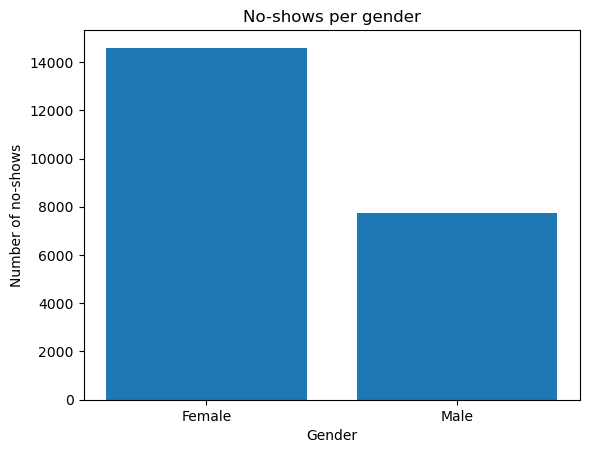

In [366]:
#Filter the dataset for no show appointments and appointments where people showed up. 
No_show = df.no_show == True
Show = df.no_show == False

#Visualize the relationship between no-show and gender. 
gender = df[No_show].groupby('gender').count()

plt.bar(['Female', 'Male'], gender['no_show'])
plt.title("No-shows per gender")
plt.xlabel("Gender")
plt.ylabel("Number of no-shows");

Although the no-show rate is higher per female patienat than for male patient, we cannot assume that there are more no-shows per women since there are in general more appointments related to women than to men. 

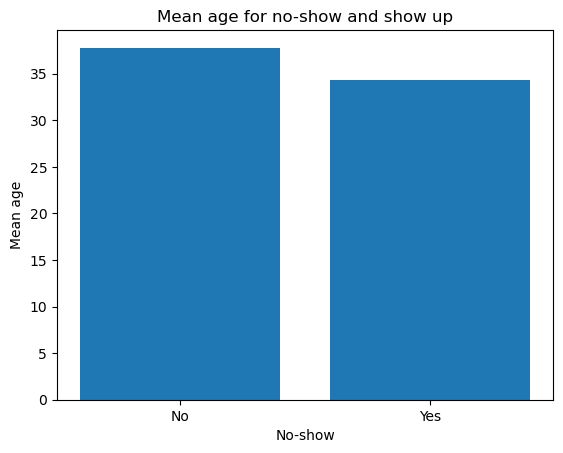

In [224]:
# Visualize the relation between no-show and mean age. 

mean_age = df.groupby('no_show').age.mean()

plt.bar(['No', 'Yes'], mean_age)
plt.title("Mean age for no-show and show up")
plt.xlabel("No-show")
plt.ylabel("Mean age");

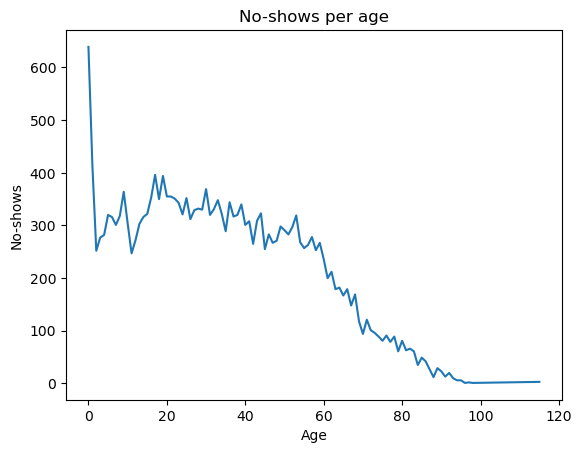

In [371]:
#Visualize the no-shows per age
no_show_age = df[No_show].groupby('age').count()

plt.plot(no_show_age.index, no_show_age['no_show'])
plt.title("No-shows per age")
plt.xlabel("Age")
plt.ylabel("No-shows");

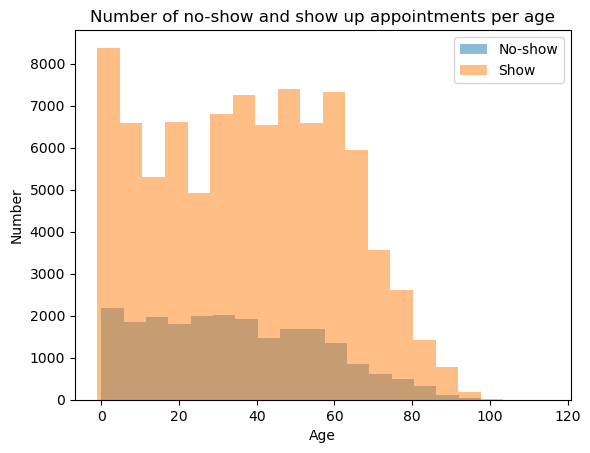

In [280]:
#Compare no-shows and show-ups per age. 
no_show_age = df[No_show].age
show_age = df[Show].age

fig, ax = plt.subplots()
width = 0.25
ax.hist(no_show_age, alpha=0.5, bins=20, label='No-show')
ax.hist(show_age, alpha=0.5, bins=20, label='Show')
ax.set_title('Number of no-show and show up appointments per age')
ax.set_xlabel('Age')
ax.set_ylabel('Number')
ax.legend()
plt.show();

Documentation missing. 

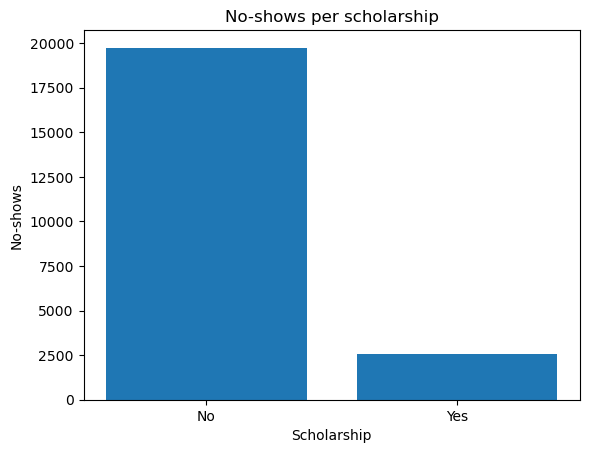

In [282]:
# Visualize the relation between no-show and scholarship. 

mean_scholarship = df[No_show].groupby('scholarship').count()

plt.bar(['No', 'Yes'], mean_scholarship['no_show'])
plt.title("No-shows per scholarship")
plt.xlabel("Scholarship")
plt.ylabel("No-shows");

In [285]:
#Mean for people showing up and not showing up who are entitled to a scholarship. 
scholar_no_show = df[No_show].scholarship.mean()
scholar_show = df[Show].scholarship.mean()
print(scholar_no_show)
print(scholar_show)

0.11550696715802679
0.09390304734264465


People with a scholarship are more likely to show up for their medical appointments. 

#### Subquestion: Is an pre-existing condition leading to higher rates in showing up? 

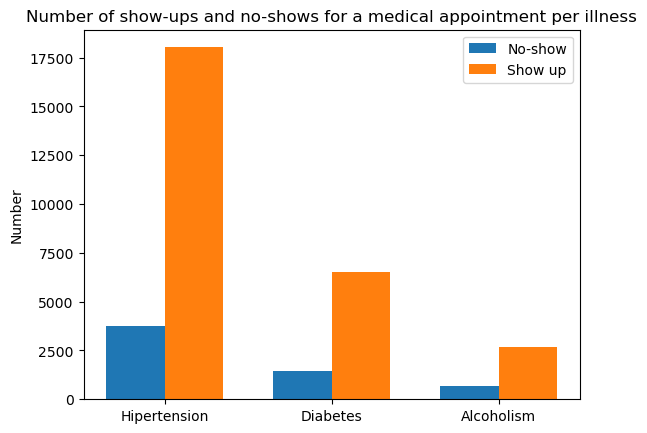

In [299]:
#Determine the means for no-show and show up for each condition. 
hipertension_no_show = df[No_show].query('hipertension == True').count()
hipertension_show = df[Show].query('hipertension == True').count()
diabetes_no_show = df[No_show].query('diabetes == True').count()
diabetes_show = df[Show].query('diabetes == True').count()
alcoholism_no_show = df[No_show].query('alcoholism == True').count()
alcoholism_show = df[Show].query('alcoholism == True').count()
no_show_cond = [hipertension_no_show.no_show, diabetes_no_show.no_show, alcoholism_no_show.no_show]
show_cond = [hipertension_show.no_show, diabetes_show.no_show, alcoholism_show.no_show]


#Visualize the no-show and show-up mean per condition. 
fig, ax = plt.subplots()
width = 0.35
x = np.arange(len(no_show))
no_show_bars = ax.bar(x, no_show_cond, width, label='No-show')
show_bars = ax.bar(x + width, show_cond, width, label='Show up')
ax.set_ylabel('Number')
ax.set_title('Number of show-ups and no-shows for a medical appointment per illness')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(['Hipertension', 'Diabetes', 'Alcoholism'])
ax.legend()
plt.show()

There is a correlation between patients with a pre-condition and the likeliness that they show up to their medical appointments. Patients with a pre-condition are more likely to show up for their appointment than patients without a pre-condition. 

In [297]:
#Check appointments of patients with condition hipertenstion.
print(df.query('hipertension == True').count())

gender            21801
scheduledday      21801
appointmentday    21801
age               21801
scholarship       21801
hipertension      21801
diabetes          21801
alcoholism        21801
sms_received      21801
no_show           21801
dtype: int64


#### Subquestion: Is there a correlation between receiving a message and showing up for the appointment?

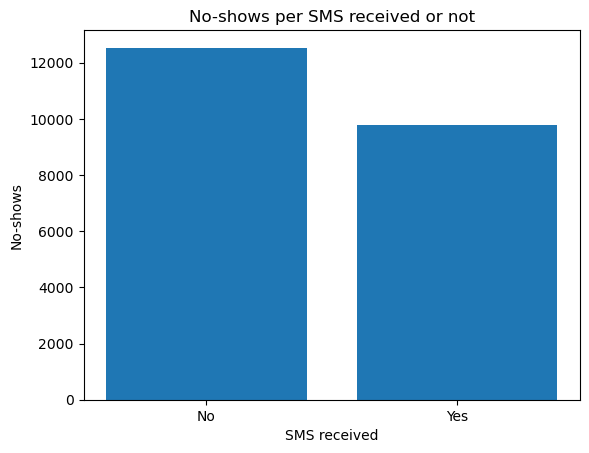

In [365]:
# Visualize the relation between no-show and receiving at least one sms message in advance. 

sms = df[No_show].groupby('sms_received').count()

plt.bar(['No', 'Yes'], sms.no_show)
plt.title("No-shows per SMS received or not")
plt.xlabel("SMS received")
plt.ylabel("No-shows");

No-shows are slightly higher when no SMS was received beforehand. The correlation is not that strong as I had expected.

### Research Question 2: Is the period between scheduling an appointment and the actual appointment an indicator if someone shows up?

In [336]:
# Get timespan between the time when the appointment was scheduled and the actual appointment. 
df['timespan'] = df['appointmentday'] - df['scheduledday']
df.head(50)

,gender,scheduledday,appointmentday,age,scholarship,hipertension,diabetes,alcoholism,sms_received,no_show,timespan
0,F,2016-04-29,2016-04-29,62,False,True,False,False,False,False,0 days
1,M,2016-04-29,2016-04-29,56,False,False,False,False,False,False,0 days
2,F,2016-04-29,2016-04-29,62,False,False,False,False,False,False,0 days
3,F,2016-04-29,2016-04-29,8,False,False,False,False,False,False,0 days
4,F,2016-04-29,2016-04-29,56,False,True,True,False,False,False,0 days
5,F,2016-04-27,2016-04-29,76,False,True,False,False,False,False,2 days
6,F,2016-04-27,2016-04-29,23,False,False,False,False,False,True,2 days
7,F,2016-04-27,2016-04-29,39,False,False,False,False,False,True,2 days
8,F,2016-04-29,2016-04-29,21,False,False,False,False,False,False,0 days
9,F,2016-04-27,2016-04-29,19,False,False,False,False,False,False,2 days


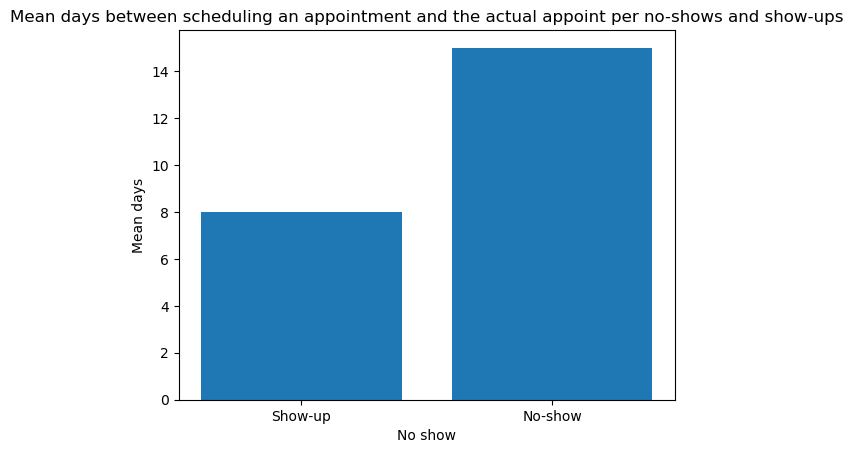

In [364]:
#Determine mean timespan between scheduling day and appointment day.
no_show_timespan = df.groupby('no_show').timespan.mean()

#Convert datetime data type into integer.
no_show_days = no_show_timespan.astype('timedelta64[D]').astype(int)

#Visualize the mean days for no-show and show-up.
plt.bar(['Show-up', 'No-show'], no_show_days)
plt.title("Mean days between scheduling an appointment and the actual appoint per no-shows and show-ups")
plt.xlabel("No show")
plt.ylabel("Mean days");

There is a correlation between the timespan when the appointment was scheduled and the actual appointment. The mean days for not showing up are 15 days and for showing up just 8 days.

<a id='conclusions'></a>
## Conclusions

The factors that most likely influence the no-show rate are if patients have a pre-condition, like hipertension, diapbetes, and alcoholism, if they are part of the scholarship programm, and the timespan between when the appointment was scheduled and the actual appointment. Patients with are pre-condition more liklely show up for appointments than patients without a pre-condition. Also patient that are part of the scholarship program show up more often. And the longer the timespan between the date of scheduling an appointment and the actual appointment the no-show rate increases. 
Age and gender are no strong indicators if someone is showing up for their medical apppointments or not. 
There is a slight correlation if patients received an SMS before their appointment, they tend to show up more often. 

### Limitations
The data I have used for the analysis does not consider unique patient. One could combine the data per patient and use it for the analysis ensuring this way that single patients that e.g. do not show up at all for appointments are not considered for the analysis as outliers. 
The second limitation is the Handcap column, which maybe does not contain the data as described in the documentation. I dropped the column in my analysis but would reach out to the data provider to clarify what the data means to better decide if the data is relevant for the questions to be analyzed, which I have not done. 
Also I did not put the specific counts for no-shows, like pre-condition, scholarship etc. in relation to the total share of these factors. This would be interesting to see in a more detailed data analysis.  


In [373]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

Traceback (most recent call last):
  File "/Users/tanja/anaconda3/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/Users/tanja/anaconda3/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/Users/tanja/anaconda3/lib/python3.10/site-packages/nbconvert/__main__.py", line 3, in <module>
    main()
  File "/Users/tanja/anaconda3/lib/python3.10/site-packages/jupyter_core/application.py", line 277, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
  File "/Users/tanja/anaconda3/lib/python3.10/site-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/Users/tanja/anaconda3/lib/python3.10/site-packages/nbconvert/nbconvertapp.py", line 423, in start
    self.convert_notebooks()
  File "/Users/tanja/anaconda3/lib/python3.10/site-packages/nbconvert/nbconvertapp.py", line 585, in convert_notebooks
    raise ValueError(
ValueError: Ple

1